In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt

/home/ningweixi/miniconda3/envs/tiscope/lib/python3.11/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [2]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.set_figure_params(dpi=80, facecolor="w", frameon=True, figsize=(4, 4))

# Integration

In [3]:
adata = sc.read_h5ad("/data2/liyuzhe/data/SPACEX/adata_ADmouse.h5ad")
adata = adata[adata.obs.label.isin(["8months-control-replicate_1", "8months-control-replicate_2", "13months-control-replicate_1", "13months-control-replicate_2"])]
adata

View of AnnData object with n_obs × n_vars = 35771 × 2766
    obs: 'biosample_id', 'donor_id', 'species', 'species__ontology_label', 'sex', 'disease', 'disease__ontology_label', 'organ', 'organ__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'batch', 'time', 'group', 'replicate', 'label', 'region', 'region_merged', 'top_level_cell_type', 'sub_level_cell_type', 'X', 'Y', 'X-scaled', 'Y-scaled', 'tissue'
    uns: 'batch_colors', 'log1p'
    obsm: 'spatial'

In [4]:
from tiscope.function import TISCOPE_integration

/home/ningweixi/miniconda3/envs/tiscope/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/home/ningweixi/miniconda3/envs/tiscope/lib/python3.11/site-packages/anndata/__init__.py:44: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  return module_get_attr_redirect(attr_name, deprecated_mapping=_DEPRECATED)
/home/ningweixi/miniconda3/envs/tiscope/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
adata = TISCOPE_integration(adata, GPU=3, outdir="./AD_integration")

Constructing spatial graph...
Processing slice ADmouse_11351_brain...
Computing spatial neighborhood graph...
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Processing slice ADmouse_9498_brain...
Computing spatial neighborhood graph...
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Processing slice ADmouse_9707_brain...
Computing spatial neighborhood graph...
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)


/home/ningweixi/miniconda3/envs/tiscope/lib/python3.11/site-packages/squidpy/gr/_utils.py:203: ImplicitModificationWarning: Setting element `.obsp['spatial_connectivities']` of view, initializing view as actual.
  obj[key] = data
/home/ningweixi/miniconda3/envs/tiscope/lib/python3.11/site-packages/squidpy/gr/_utils.py:203: ImplicitModificationWarning: Setting element `.obsp['spatial_connectivities']` of view, initializing view as actual.
  obj[key] = data
/home/ningweixi/miniconda3/envs/tiscope/lib/python3.11/site-packages/squidpy/gr/_utils.py:203: ImplicitModificationWarning: Setting element `.obsp['spatial_connectivities']` of view, initializing view as actual.
  obj[key] = data


Processing slice ADmouse_9735_brain...
Computing spatial neighborhood graph...
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)


/home/ningweixi/miniconda3/envs/tiscope/lib/python3.11/site-packages/squidpy/gr/_utils.py:203: ImplicitModificationWarning: Setting element `.obsp['spatial_connectivities']` of view, initializing view as actual.
  obj[key] = data


Computing neighborhood molecular profiles...
Computed neighbor average in 0.03 mins
Constructing microenvironment similarity neighborhood graph...


/data1/ningweixi/HOME/projects/TISCOPE/src/tiscope/function.py:213: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:253.)
  edge_index = torch.tensor(A.nonzero(), dtype=torch.long)


Dataset stats - Nodes: 35771 | Edges: 1050146 | Features: 2766
Model architecture:
TISCOPE(
  (encoder): GAT_Encoder(
    (hidden_layer1): GATv2Conv(2766, 128, heads=6)
    (hidden_layer2): GATv2Conv(768, 128, heads=6)
    (conv_z): GATv2Conv(768, 10, heads=6)
  )
  (decoder): InnerProductDecoder()
  (decoder_x): NN(
    (net): ModuleList(
      (0): Block(
        (fc): Linear(in_features=10, out_features=2766, bias=True)
        (norm): DSBatchNorm(
          (bns): ModuleList(
            (0-3): 4 x BatchNorm1d(2766, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          )
        )
        (act): ReLU()
      )
    )
  )
)
Starting TISCOPE training...


 27%|██▋       | 275/1001 [15:51<41:50,  3.46s/it]  

Early stopping triggered.
Model loaded successfully from ./AD_integration/model.pt
Early stopping triggered at epoch 275
Performing inference...


Computing neighbors and UMAP...
computing neighbors
    finished: added to `.uns['TISCOPE']`
    `.obsp['TISCOPE_distances']`, distances for each pair of neighbors
    `.obsp['TISCOPE_connectivities']`, weighted adjacency matrix (0:00:26)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:22)
Results saved to ./AD_integration/adata.h5ad


In [14]:
sc.tl.louvain(adata, resolution=0.05, neighbors_key="TISCOPE")

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 4 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:02)


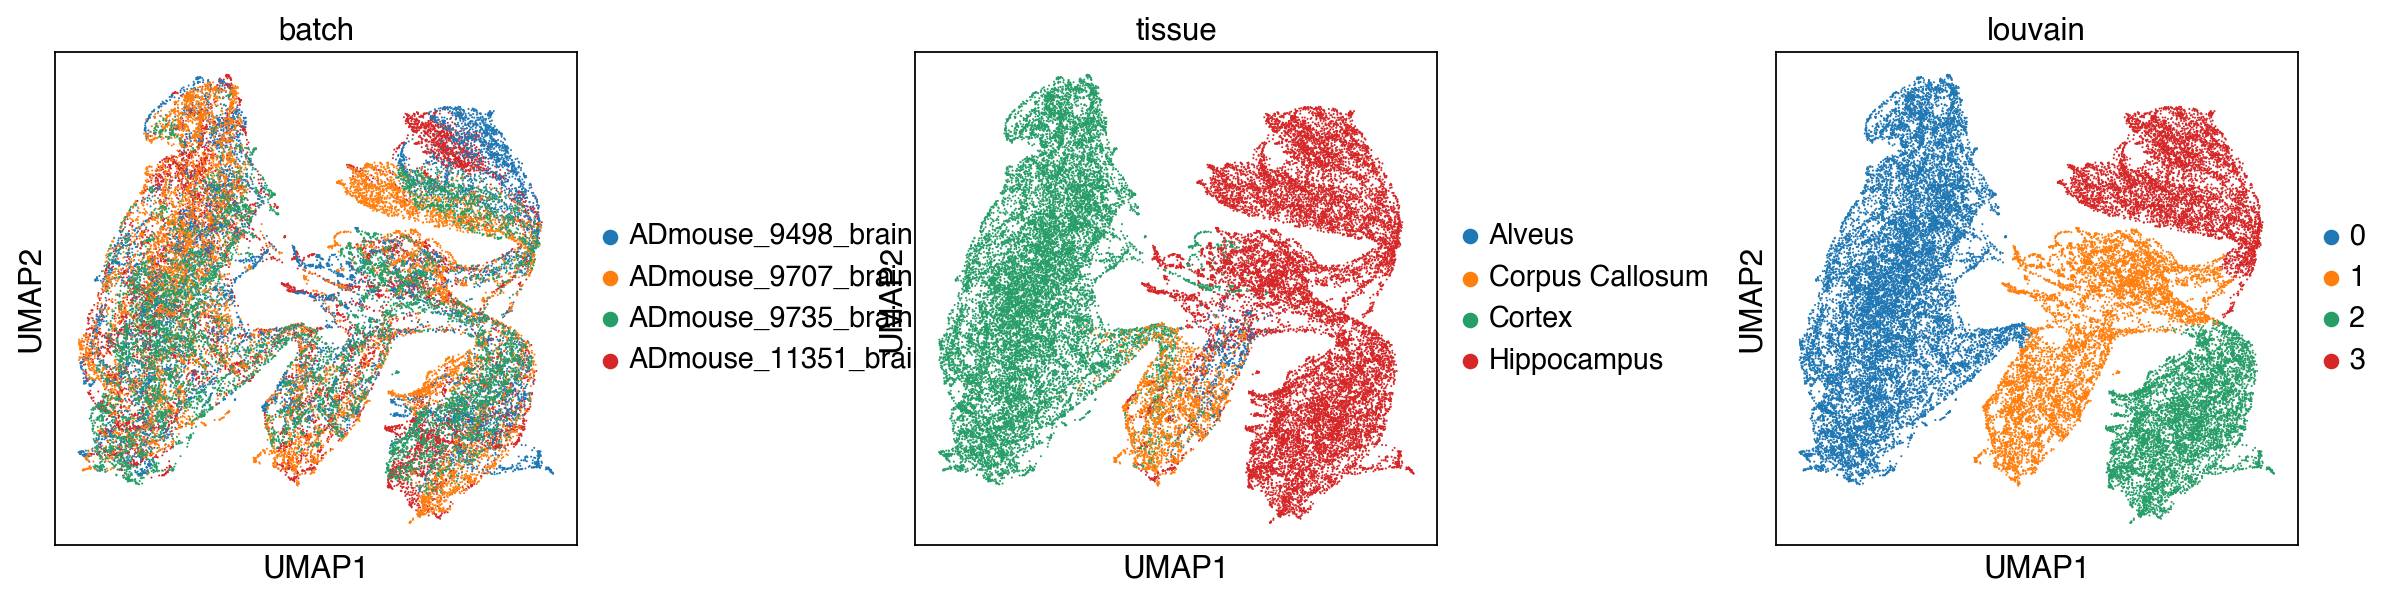

In [15]:
sc.pl.umap(adata, color=["batch", "tissue", "louvain"], wspace=0.5)

In [16]:
from sklearn.metrics.cluster import adjusted_rand_score as ARI
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI

In [17]:
ARI(adata.obs['tissue'].values,adata.obs['louvain'].values)

0.6078533658810545

In [18]:
NMI(adata.obs['tissue'].values,adata.obs['louvain'].values)

0.6196227525225798